In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime 
import matplotlib.style as style
import warnings
warnings.filterwarnings('ignore')

# 1) Business Understanding

##### a) Motivation

Since I am a passionate football fan, I really enjoy taking looks at all different kinds of tables: local leagues, European champions competitions, continental and international tournaments like the UEFA EURO or FIFA world cup.
The other day I discovered the All-time table of the FIFA World Cup. I instantly wondered what would happen, if you take different points of view e.g. subtract the home advantage, see if the continent where the tournament is played matters or create a new All-time table which includes scores from continental championships, qualification and friendly matches.

##### b) Overview of Datasets

The excel file 'all_time_world.xlsx' contains the All-time table of the FIFA World Cup. It compares men's national association football teams that have participated in the FIFA World Cup by several criteria including tournaments played, consecutive tournaments played or missed, matches, wins, draws, losses, goals, points, points per match, best finish, and confederation.

The csv file 'results.csv' contains a table with International football results from 1872 to 2019 including the FIFA world cup, continental competitions, qualification games, friendly games and many more.

##### c) The questions I will target

Q1: Do hosting countires have an higher probability in winning games than other participating countries due to home advantage?

Q2: How does the All-time table change if you extract the games with home advantage?

Q3: Which larger active tournament has the highest avg. goals per game?


Q4: Model sth.

Bonus: How different would an All-time table with all tournaments, qualification games and friendly matches be from the All-time table of the FIFA World Cup? 

# 2) Data Understanding

##### All-time table of the FIFA World Cup

In [64]:
df_all_time = pd.read_excel('all_time_world.xlsx')

In [65]:
df_all_time.head()

,Country,Participation,Games,W,D,L,T+,T-,Diff.,Points,Ø-Points,Penalty − W:L,Best finish,Unnamed: 13,Confederation
0,Brazil,21,109,73,18,18,229,105,124,237,2.17,4 – 3:1,"Champion (1958, 1962, 1970, 1994, 2002)",NaN,CONMEBOL
1,Germany[A],19,109,67,20,22,226,125,101,221,2.03,4 – 4:0,"Champion (1954, 1974, 1990, 2014)",NaN,UEFA
2,Italy,18,83,45,21,17,128,77,51,156,1.88,4 – 1:3,"Champion (1934, 1938, 1982, 2006)",NaN,UEFA
3,Argentina,17,81,43,15,23,137,93,44,144,1.78,5 – 4:1,"Champion (1978, 1986)",NaN,CONMEBOL
4,France,15,66,34,13,19,120,77,43,115,1.74,4 – 2:2,"Champion (1998, 2018)",NaN,UEFA


In [66]:
# number of teams that ever participated in a world cup
df_all_time.shape[0]

78

In [67]:
df_all_time.columns

Index(['Country', 'Participation', 'Games', 'W', 'D', 'L', 'T+', 'T-', 'Diff.',
       'Points', 'Ø-Points', 'Penalty − W:L', 'Best finish', 'Unnamed: 13',
       'Confederation'],
      dtype='object')

In [68]:
df_all_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 15 columns):
Country          78 non-null object
Participation    78 non-null int64
Games            78 non-null object
W                78 non-null object
D                78 non-null object
L                78 non-null object
T+               78 non-null int64
T-               78 non-null int64
Diff.            78 non-null object
Points           78 non-null int64
Ø-Points         78 non-null float64
Penalty − W:L    30 non-null object
Best finish      78 non-null object
Unnamed: 13      0 non-null float64
Confederation    78 non-null object
dtypes: float64(2), int64(4), object(9)
memory usage: 9.2+ KB


###### International football results from 1872 to 2019

In [69]:
df_results = pd.read_csv('results.csv')

In [70]:
df_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [71]:
# number of international football games played since 1872
df_results.shape[0]

40839

In [72]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
date          40839 non-null object
home_team     40839 non-null object
away_team     40839 non-null object
home_score    40839 non-null int64
away_score    40839 non-null int64
tournament    40839 non-null object
city          40839 non-null object
country       40839 non-null object
neutral       40839 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [73]:
# Overview of tournaments in the dataset
tournaments = df_results.tournament.unique()
tournaments

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'CCCF Championship',
       'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Durán', 'UAFA Cup', 'South Pacific Games',
       'CONCACAF Championship qualificatio

In [74]:
# Top 5 Type of International football matches
df_tournament_count = pd.DataFrame(columns=['Tournament'])
for t in tournaments:
    tournament_count = len(df_results[df_results['tournament'] == t])
    df_tournament_count.loc[t] = tournament_count
df_tournament_count.sort_values(by=['Tournament'], ascending=False).head()

,Tournament
Friendly,16911
FIFA World Cup qualification,7100
UEFA Euro qualification,2432
African Cup of Nations qualification,1616
FIFA World Cup,900


# 3) Data Preparation

In [75]:
# drop column with NaN values
df_all_time.drop(axis=0, columns=['Unnamed: 13'], inplace=True)

In [76]:
df_all_time.columns

Index(['Country', 'Participation', 'Games', 'W', 'D', 'L', 'T+', 'T-', 'Diff.',
       'Points', 'Ø-Points', 'Penalty − W:L', 'Best finish', 'Confederation'],
      dtype='object')

In [77]:
# replace missing values with 0 in 'Penalty − W:L' column
df_all_time['Penalty − W:L'].fillna(0, inplace=True)

In [78]:
df_all_time.head()

,Country,Participation,Games,W,D,L,T+,T-,Diff.,Points,Ø-Points,Penalty − W:L,Best finish,Confederation
0,Brazil,21,109,73,18,18,229,105,124,237,2.17,4 – 3:1,"Champion (1958, 1962, 1970, 1994, 2002)",CONMEBOL
1,Germany[A],19,109,67,20,22,226,125,101,221,2.03,4 – 4:0,"Champion (1954, 1974, 1990, 2014)",UEFA
2,Italy,18,83,45,21,17,128,77,51,156,1.88,4 – 1:3,"Champion (1934, 1938, 1982, 2006)",UEFA
3,Argentina,17,81,43,15,23,137,93,44,144,1.78,5 – 4:1,"Champion (1978, 1986)",CONMEBOL
4,France,15,66,34,13,19,120,77,43,115,1.74,4 – 2:2,"Champion (1998, 2018)",UEFA


In [79]:
df_adjusted = df_all_time.copy()

In [80]:
# drop unnecessary columns
df_adjusted.drop(axis=0, columns=['Diff.', 'T+', 'T-', 'Participation'], inplace=True)

In [81]:
# converting from string to float

# only relevant to business question
# in prep bereich
df_adjusted['Games'] = df_adjusted['Games'].astype(float)
df_adjusted['W'] = df_adjusted['W'].astype(float)
df_adjusted['D'] = df_adjusted['D'].astype(float)
df_adjusted['L'] = df_adjusted['L'].astype(float)

In [82]:
# Calculates the win/draw/loose share of all teams including hosts
df_adjusted['win_share'] = (df_adjusted['W']/df_adjusted['Games'])
df_adjusted['draw_share'] = (df_adjusted['D']/df_adjusted['Games'])
df_adjusted['loose_share'] = (df_adjusted['L']/df_adjusted['Games'])

In [83]:
def sub_results(value):
    # value = country
    df_country = df_world_cup_not_neutral[df_world_cup_not_neutral['home_team'] == value]
    df_country['h_win'] = np.where(df_country['home_score'] > 
                                   df_country['away_score'], 1,0)
    df_country['h_draw'] = np.where(df_country['home_score'] == df_country['away_score'], 1,0)
    df_country['h_lost'] = np.where(df_country['home_score'] < 
                                    df_country['away_score'], 1,0)
    d_host_counts_win[value] = d_host_counts_win[value] - (
        d_host_counts_win[value] - df_country.h_win.sum()
    )
    d_host_counts_draw[value] = d_host_counts_draw[value] - (
        d_host_counts_draw[value] - df_country.h_draw.sum()
    )
    d_host_counts_lost[value] = d_host_counts_lost[value] - (
        d_host_counts_lost[value] - df_country.h_lost.sum()
    )

In [84]:
df_world_cup_not_neutral

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win
1309,1930-07-18,Uruguay,Peru,1,0,FIFA World Cup,Montevideo,Uruguay,False,True
1314,1930-07-21,Uruguay,Romania,4,0,FIFA World Cup,Montevideo,Uruguay,False,True
1318,1930-07-27,Uruguay,Yugoslavia,6,1,FIFA World Cup,Montevideo,Uruguay,False,True
1319,1930-07-30,Uruguay,Argentina,4,2,FIFA World Cup,Montevideo,Uruguay,False,True
1680,1934-05-27,Italy,United States,7,1,FIFA World Cup,Rome,Italy,False,True
1685,1934-05-31,Italy,Spain,1,1,FIFA World Cup,Florence,Italy,False,False
1686,1934-06-01,Italy,Spain,1,0,FIFA World Cup,Florence,Italy,False,True
1688,1934-06-03,Italy,Austria,1,0,FIFA World Cup,Milan,Italy,False,True
1691,1934-06-10,Italy,Czechoslovakia,2,1,FIFA World Cup,Rome,Italy,False,True
2090,1938-06-05,France,Belgium,3,1,FIFA World Cup,Colombes,France,False,True


# 4) Questions

##### Q1: Do hosting countires have an higher probability in winning games than other participating countries due to home advantage?

In [85]:
df_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [86]:
# Select from tournament columns 'FIFA World Cup' and only countries that hosted a world cup
df_world_cup_not_neutral = df_results[(df_results['tournament'] == 'FIFA World Cup') & 
                                      (df_results['neutral'] == False)]

In [87]:
# Substract the home column from away column to create boolean column with home wins
df_world_cup_not_neutral['home_win'] = np.where(df_world_cup_not_neutral['home_score'] > 
                                                df_world_cup_not_neutral['away_score'], True, False)

In [88]:
# average percantage of winning for a hosting country 
df_world_cup_not_neutral.home_win.sum() / df_world_cup_not_neutral.shape[0] * 100

62.71186440677966

In [89]:
df_champions = df_all_time[df_all_time['Best finish'].str.contains("Champion")]

In [90]:
# Creating a new df to save which host won the title
df_hosts = df_world_cup_not_neutral[['date', 'country']]

In [91]:
df_hosts = df_hosts.drop_duplicates(subset='date', keep='first')

In [92]:
df_hosts["year"]= 1
df_hosts["year"]= df_hosts["date"].str.split("-", n = 1, expand = True) 
df_hosts.drop_duplicates(subset='year', keep='first', inplace=True)
df_hosts.drop(axis=0, columns=['date'], inplace=True)
df_hosts.reset_index(inplace=True)
df_hosts['won_title'] = False

In [93]:
# Mannually inserting if a hosting country has won the world cup
df_hosts.loc[0, "won_title"] = True
df_hosts.loc[1, "won_title"] = True
df_hosts.loc[2, "won_title"] = False
df_hosts.loc[3, "won_title"] = False
df_hosts.loc[4, "won_title"] = False
df_hosts.loc[5, "won_title"] = False
df_hosts.loc[6, "won_title"] = False
df_hosts.loc[7, "won_title"] = True
df_hosts.loc[8, "won_title"] = False
df_hosts.loc[9, "won_title"] = True
df_hosts.loc[10, "won_title"] = True
df_hosts.loc[11, "won_title"] = False
df_hosts.loc[12, "won_title"] = False
df_hosts.loc[13, "won_title"] = False
df_hosts.loc[14, "won_title"] = False
df_hosts.loc[15, "won_title"] = False
df_hosts.loc[16, "won_title"] = False
df_hosts.loc[17, "won_title"] = False
df_hosts.loc[18, "won_title"] = False
df_hosts.loc[19, "won_title"] = False
df_hosts.loc[20, "won_title"] = False

In [94]:
df_hosts.head()

,index,country,year,won_title
0,1309,Uruguay,1930,True
1,1680,Italy,1934,True
2,2090,France,1938,False
3,3103,Brazil,1950,False
4,3641,Switzerland,1954,False


In [95]:
# percentage of hosts winning the world cup
df_hosts.won_title.sum() / df_hosts.shape[0] * 100

23.809523809523807

From the result 'average percantage of winning for a hosting country'  (62%) we can see, that hosting countries have a slight advantage against other participating teams, given a simplified 50:50 chance of winning a game. 

Regarding the total count of world cups, the hosting countries have a 23% probablitlyt in actually winning the world cup. But since 1978, there has not been a hosting country that won the world cup. 

##### Q2: How does the All-time table change if you extract the games with home advantage?

The idea is, to substract the matches where teams had an home advantage by hosting the world cup. The matches will be substracted in total from 'Games' column, but also from 'W', 'D' and 'L' columns. Then we are going to analyze how it affected the teams by updating the 'Points' column and correcting their position in the table.

I expect the top 5 countries of the all-time table to loose most points and positions, since they have attended more world cup games than other hosts, since they mostly did not got disqualified in the group stage, and therefore have accumulated more wins and draws. Substractung these, might hurt the top 5 countries more than the less performant countries. 

In [96]:
df_all_time.head()

,Country,Participation,Games,W,D,L,T+,T-,Diff.,Points,Ø-Points,Penalty − W:L,Best finish,Confederation
0,Brazil,21,109,73,18,18,229,105,124,237,2.17,4 – 3:1,"Champion (1958, 1962, 1970, 1994, 2002)",CONMEBOL
1,Germany[A],19,109,67,20,22,226,125,101,221,2.03,4 – 4:0,"Champion (1954, 1974, 1990, 2014)",UEFA
2,Italy,18,83,45,21,17,128,77,51,156,1.88,4 – 1:3,"Champion (1934, 1938, 1982, 2006)",UEFA
3,Argentina,17,81,43,15,23,137,93,44,144,1.78,5 – 4:1,"Champion (1978, 1986)",CONMEBOL
4,France,15,66,34,13,19,120,77,43,115,1.74,4 – 2:2,"Champion (1998, 2018)",UEFA


In [97]:
# adds a column with the index value + 1 to the table, in order to substract later the newly calculated 
# index from the former one
df_all_time['Position'] = df_all_time.Country.index + 1

In [98]:
d_host_counts = dict(df_world_cup_not_neutral['home_team'].value_counts())

In [99]:
d_host_counts_win = d_host_counts.copy()
d_host_counts_draw = d_host_counts.copy()
d_host_counts_lost = d_host_counts.copy()

In [100]:
d_host_counts

{'Germany': 14,
 'Brazil': 13,
 'Italy': 12,
 'Mexico': 9,
 'France': 9,
 'Argentina': 7,
 'South Korea': 7,
 'Sweden': 6,
 'England': 6,
 'Chile': 6,
 'Russia': 5,
 'Spain': 5,
 'Uruguay': 4,
 'Switzerland': 4,
 'Japan': 4,
 'United States': 4,
 'South Africa': 3}

In [101]:
# Substract number of world cup games from hosting countries
values = d_host_counts.keys()    
for v in values:
    df_adjusted.loc[df_adjusted[df_adjusted['Country'].str.contains(v)].index[0], "Games"] = df_adjusted.loc[
        df_adjusted[df_adjusted['Country'].str.contains(v)].index[0], "Games"
    ] - d_host_counts[v]
    

In [102]:
df_adjusted.head()

,Country,Games,W,D,L,Points,Ø-Points,Penalty − W:L,Best finish,Confederation,win_share,draw_share,loose_share
0,Brazil,96.0,73.0,18.0,18.0,237,2.17,4 – 3:1,"Champion (1958, 1962, 1970, 1994, 2002)",CONMEBOL,0.669725,0.165138,0.165138
1,Germany[A],95.0,67.0,20.0,22.0,221,2.03,4 – 4:0,"Champion (1954, 1974, 1990, 2014)",UEFA,0.614679,0.183486,0.201835
2,Italy,71.0,45.0,21.0,17.0,156,1.88,4 – 1:3,"Champion (1934, 1938, 1982, 2006)",UEFA,0.542169,0.253012,0.204819
3,Argentina,74.0,43.0,15.0,23.0,144,1.78,5 – 4:1,"Champion (1978, 1986)",CONMEBOL,0.530864,0.185185,0.283951
4,France,57.0,34.0,13.0,19.0,115,1.74,4 – 2:2,"Champion (1998, 2018)",UEFA,0.515152,0.196970,0.287879


In [103]:
# Substracts count of wins,draws and losts from host teams. The method sub_results(v) counts of 
# each hosting country the wins, draws and losses. The results are stored in the dictionaries d_host_counts_win, 
# d_host_counts_draw and d_host_counts_lost. These are substracted from the values of each column of the all-time 
# table.
values = d_host_counts.keys()   
for v in values:
    sub_results(v)
    df_adjusted.loc[df_adjusted[df_adjusted['Country'].str.contains(v)].index[0], "W"] = df_adjusted.loc[
        df_adjusted[df_adjusted['Country'].str.contains(v)].index[0], "W"
    ] - d_host_counts_win[v]
    df_adjusted.loc[df_adjusted[df_adjusted['Country'].str.contains(v)].index[0], "D"] = df_adjusted.loc[
        df_adjusted[df_adjusted['Country'].str.contains(v)].index[0], "D"
    ] - d_host_counts_draw[v] 
    df_adjusted.loc[df_adjusted[df_adjusted['Country'].str.contains(v)].index[0], "L"] = df_adjusted.loc[
        df_adjusted[df_adjusted['Country'].str.contains(v)].index[0], "L"
    ] - d_host_counts_lost[v]

In [104]:
df_adjusted

,Country,Games,W,D,L,Points,Ø-Points,Penalty − W:L,Best finish,Confederation,win_share,draw_share,loose_share
0,Brazil,96.0,66.0,15.0,15.0,237,2.17,4 – 3:1,"Champion (1958, 1962, 1970, 1994, 2002)",CONMEBOL,0.669725,0.165138,0.165138
1,Germany[A],95.0,56.0,19.0,20.0,221,2.03,4 – 4:0,"Champion (1954, 1974, 1990, 2014)",UEFA,0.614679,0.183486,0.201835
2,Italy,71.0,35.0,19.0,17.0,156,1.88,4 – 1:3,"Champion (1934, 1938, 1982, 2006)",UEFA,0.542169,0.253012,0.204819
3,Argentina,74.0,38.0,14.0,22.0,144,1.78,5 – 4:1,"Champion (1978, 1986)",CONMEBOL,0.530864,0.185185,0.283951
4,France,57.0,27.0,12.0,18.0,115,1.74,4 – 2:2,"Champion (1998, 2018)",UEFA,0.515152,0.196970,0.287879
5,England,63.0,24.0,20.0,19.0,108,1.57,4 – 1:3,Champion (1966),UEFA,0.420290,0.304348,0.275362
6,Spain,58.0,29.0,13.0,16.0,105,1.67,4 – 1:3,Champion (2010),UEFA,0.476190,0.238095,0.285714
7,Netherlands,50.0,27.0,12.0,11.0,93,1.86,3 – 1:2,"Runner-up (1974, 1978, 2010)",UEFA,0.540000,0.240000,0.220000
8,Uruguay,52.0,20.0,12.0,20.0,84,1.50,1 – 1:0,"Champion (1930, 1950)",CONMEBOL,0.428571,0.214286,0.357143
9,Sweden,45.0,15.0,12.0,18.0,70,1.37,1 – 1:0,Runner-up (1958),UEFA,0.372549,0.254902,0.372549


In [105]:
# Calculates the new points for each host team
#values = d_host_counts.keys()    
for v in values:
    df_adjusted.loc[
        df_adjusted[df_adjusted['Country'].str.contains(v)].index[0], "Points"
                    ] = df_adjusted.loc[
                        df_adjusted[df_adjusted['Country'].str.contains(v)].index[0], "W"
                        ] * 3 + df_adjusted.loc[df_adjusted[
                        df_adjusted['Country'].str.contains(v)].index[0], "D"
                        ]

In [106]:
# recalculates win/draw/loose share for all teams
df_adjusted['win_share'] = (df_adjusted['W']/df_adjusted['Games'])
df_adjusted['draw_share'] = (df_adjusted['D']/df_adjusted['Games'])
df_adjusted['loose_share'] = (df_adjusted['L']/df_adjusted['Games'])


In [107]:
df_adjusted.sort_values(by=['Points'], ascending=False, inplace=True)


In [108]:
df_diff = df_adjusted[['Country', 'Games', 'W', 'D', 'L', 'Points']]

In [109]:
# calculates how many points were lost by each hosting country
df_diff['diff_points'] =  df_adjusted.Points - df_all_time.Points 

In [110]:
# calculates how many positions were lost by each hosting country
df_diff['position_loss'] = (df_adjusted.index + 1) - df_all_time.Position.values 

In [111]:
# drops non hosting countries since they are not relevant for visualisation
df_diff_hosts = df_diff[df_diff.diff_points != 0.0]

In [112]:
df_diff_hosts.sort_values(by=['diff_points'], inplace=True)

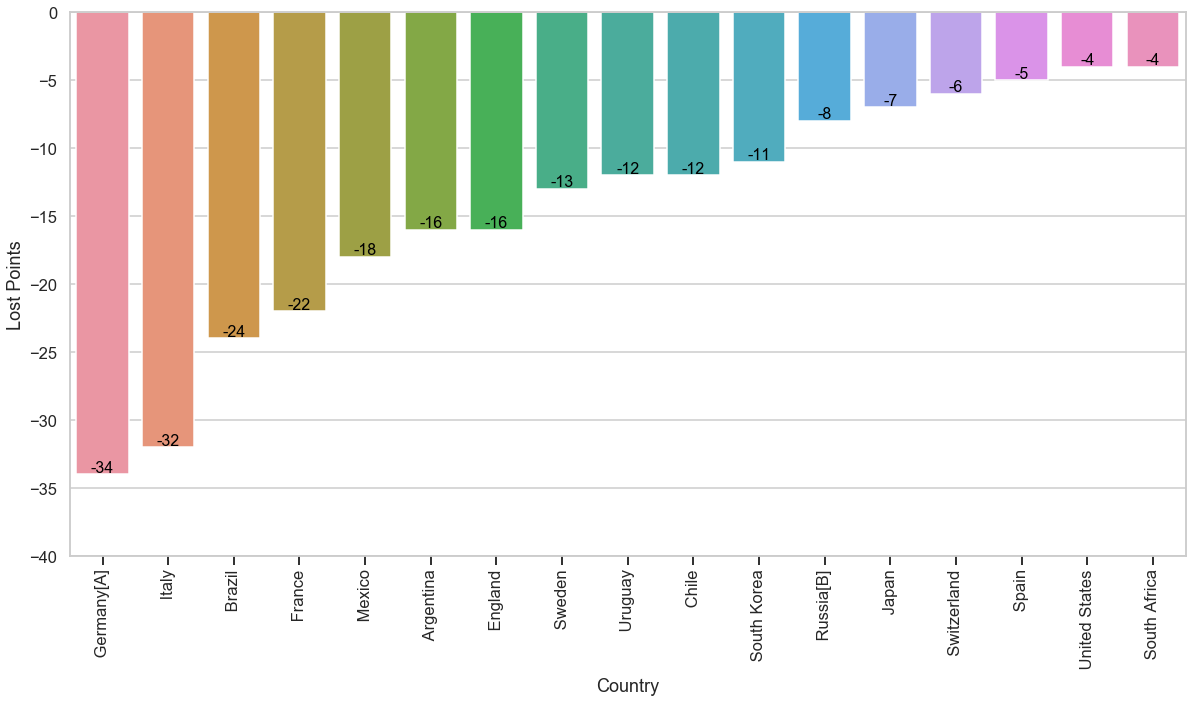

In [113]:
f, ax = plt.subplots(figsize=(20, 10))
sns.set(style='whitegrid')
sns.set_context('talk')
sns.barplot(data=df_diff_hosts, x='Country', y='diff_points')
ax.set( ylabel="Lost Points", xlim=(-0.5,16.5),
       xlabel='Country', ylim=(-40, 0))
ax.xaxis.set_ticks_position('bottom')
plt.xticks(rotation=90)
#sns.despine(left=True, bottom=True)
sns.set_context('talk')
for p in ax.patches:
    ax.annotate(
        s='{}'.format(int(p.get_height())),
        xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
        xycoords='data',
        ha='center', 
        va='center', 
        fontsize=16, 
        color='black',
        xytext=(0,7), 
        textcoords='offset points',
        clip_on=True,                   # <---  important
    )

In [114]:
df_diff_hosts.sort_values(by=['position_loss'], ascending = True,inplace=True)

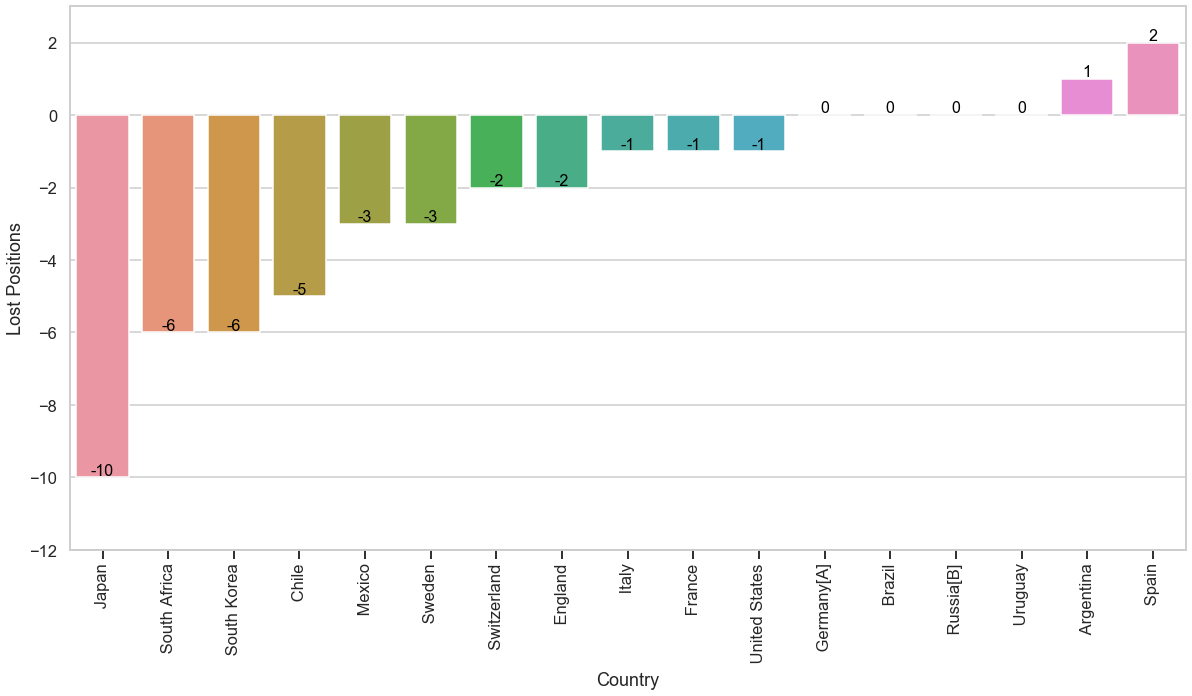

In [115]:
f, ax = plt.subplots(figsize=(20, 10))
sns.set(style='whitegrid')
sns.set_context('talk')
sns.barplot(data=df_diff_hosts, x='Country', y='position_loss')
ax.set( ylabel="Lost Positions", xlim=(-0.5,16.5),
       xlabel='Country', ylim=(-12, 3))
ax.xaxis.set_ticks_position('bottom')
plt.xticks(rotation=90)
#sns.despine(left=True, bottom=True)
sns.set_context('talk')
for p in ax.patches:
    ax.annotate(
        s='{}'.format(int(p.get_height())),
        xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
        xycoords='data',
        ha='center', 
        va='center', 
        fontsize=16, 
        color='black',
        xytext=(0,7), 
        textcoords='offset points',
        clip_on=True,                   # <---  important
    )

In [116]:
df_adjusted.head()

,Country,Games,W,D,L,Points,Ø-Points,Penalty − W:L,Best finish,Confederation,win_share,draw_share,loose_share
0,Brazil,96.0,66.0,15.0,15.0,213.0,2.17,4 – 3:1,"Champion (1958, 1962, 1970, 1994, 2002)",CONMEBOL,0.687500,0.156250,0.156250
1,Germany[A],95.0,56.0,19.0,20.0,187.0,2.03,4 – 4:0,"Champion (1954, 1974, 1990, 2014)",UEFA,0.589474,0.200000,0.210526
3,Argentina,74.0,38.0,14.0,22.0,128.0,1.78,5 – 4:1,"Champion (1978, 1986)",CONMEBOL,0.513514,0.189189,0.297297
2,Italy,71.0,35.0,19.0,17.0,124.0,1.88,4 – 1:3,"Champion (1934, 1938, 1982, 2006)",UEFA,0.492958,0.267606,0.239437
6,Spain,58.0,29.0,13.0,16.0,100.0,1.67,4 – 1:3,Champion (2010),UEFA,0.500000,0.224138,0.275862


Substracting the games with home advantage, affected the teams in different ways. 
Germany and Brazil hosted the highest amount of games but performed above average in the world cups. Therefore their loss of 34 and 24 points each, did not affect their ranking. Some hosting countries affected each others ranking which can be explained by their overall performance in the world cups. Italy(32) lost 16 more points than Argentina(16) which made them switch positions.

In the lost-points graph its clear, that countries that performed poorly in their world cup history were much more affected, than teams that performed over average, even though they hosted more games and lost more points. Their high number of wins can bounce off the substraction of the games with home advantage. 

 The loss of 4 games with home advantage and 7 points made Japan loose 10 positions. South Africa lost 6 position by just loosing 3 games and 4 points. This underlines that the world cup history (games played besides the hosted world cup) and played games in total are crucial to the overall performance in the all time table.

##### 3) Which larger active tournament has the highest avg. goals per game?


Since 1872, there were 109 different tournaments played, with a total of 40.839 games played. I would like to know, regarding tournaments that are active (last game max. 5 years ago), which tournament has the highest avg. goal score per game. I would assume that qualification games or tournaments with an high performance gap, have the highest avg goal score per match. 

In [117]:
# this loop calcualtates the avg goal score per game, total games count and last game played for each tournament
tournament = df_results.tournament.unique()
d_avg_goal_per_game = {}
d_games_total = {}
d_t_last = {}
for t in tournaments:
    a = df_results[
        df_results['tournament'] == t 
    ].home_score.sum() / df_results[
        df_results['tournament'] == t 
    ].away_score.sum()
#     avg. goals per game
    d_avg_goal_per_game[t] = a.mean()
#     total games count
    d_games_total[t] = df_results[df_results['tournament'] == t ].shape[0]
#     last game played
    d_t_last[t] =  max(df_results[df_results['tournament'] == t ].date)

In [118]:
# creates a new df to store key and values from d_avg_goal_per_game dictionray
df_avg_goal_per_game = pd.DataFrame(columns=['Tournament','Ø-Goals'])

In [120]:
df_avg_goal_per_game['Tournament'] = d_avg_goal_per_game.keys()
df_avg_goal_per_game['Ø-Goals'] = d_avg_goal_per_game.values()

In [135]:
df_avg_goal_per_game.sort_values('Ø-Goals', ascending=False, inplace=True)
df_avg_goal_per_game

,Tournament,Ø-Goals
107,Atlantic Heritage Cup,5.000000
97,Nations Cup,5.000000
81,UNIFFAC Cup,4.250000
105,AFF Championship qualification,4.000000
102,Copa América qualification,4.000000
94,Dragon Cup,3.750000
80,SKN Football Festival,3.333333
54,Mundialito,2.800000
96,Nile Basin Tournament,2.700000
40,GaNEFo,2.521739


In [122]:
# creates a new df to store key and values from d_games_total dictionray
df_matches_count = pd.DataFrame(columns=['Tournament', 'Count'])

In [123]:
df_matches_count['Tournament'] = d_games_total.keys()
df_matches_count['Count'] = d_games_total.values()

In [137]:
df_matches_count.sort_values('Count', ascending=False, inplace=True)
len(df_matches_count)

37

In [125]:
# selecting only tournaments with a total count larger than 100, to exclude too small or local tournaments
df_matches_count = df_matches_count[df_matches_count.Count > 100]

In [126]:
df_avg_goals_match_100_plus = df_avg_goal_per_game[
    df_avg_goal_per_game['Tournament'].isin(df_matches_count['Tournament'])
]

In [127]:
# creates a new df to store key and values from d_t_last dictionray
df_still_active = pd.DataFrame(columns=['Tournament', 'Last_year'])

In [128]:
df_still_active['Tournament'] = d_t_last.keys()
df_still_active['Last_year'] = d_t_last.values()

In [129]:
df_still_active['Last_year'] = pd.to_datetime(df_still_active['Last_year'], errors='coerce')

In [130]:
# selecting only tournaments after 2014, assuming they are still active, since some tourmanets 
# have cycles of max. 5 years
df_active = df_still_active[df_still_active['Last_year'].dt.year >= 2015]

In [131]:
df_avg_goals_match_100_plus_active = df_avg_goals_match_100_plus[
    df_avg_goals_match_100_plus['Tournament'].isin(df_active['Tournament'])
]

In [138]:
df_avg_goals_match_100_plus_active.sort_values('Ø-Goals', ascending=False, inplace=True)
df_avg_goals_match_100_plus_active

,Tournament,Ø-Goals
22,AFC Asian Cup qualification,2.125323
65,UNCAF Cup,2.007194
31,African Cup of Nations qualification,1.987587
47,Oceania Nations Cup,1.807692
73,SAFF Cup,1.753521
51,CFU Caribbean Cup qualification,1.693283
66,Gold Cup,1.687500
74,AFF Championship,1.687166
15,FIFA World Cup qualification,1.671179
106,UEFA Nations League,1.514706


From 109 tournaments 27 are left, that meet the requirements of having more than 100 games played in total and being active (last game max. 5 years ago).

Taking a look at the top 5, 2 of the tournaments are qualifications and three larger locally tournaments, which are mostly dominated by a few bigger teams(countries), e.g. Costa Rica at UNCAF Cup (abolished 2017), New Zealand at Oceania Nations Cup and India at SAFF Cup.

Therefore the results are as expected.

# 5) Model

In [133]:
d_avg_goal_per_game

{'Friendly': 1.4038028030971283,
 'British Championship': 1.2300884955752212,
 'Copa Lipton': 1.72,
 'Copa Newton': 1.411764705882353,
 'Copa Premio Honor Argentino': 1.6153846153846154,
 'Copa Premio Honor Uruguayo': 1.625,
 'Copa Roca': 1.2727272727272727,
 'Copa América': 1.4771863117870723,
 'Copa Chevallier Boutell': 1.4883720930232558,
 'Nordic Championship': 1.280922431865828,
 'International Cup': 1.4537037037037037,
 'Baltic Cup': 1.3402061855670102,
 'Balkan Cup': 1.553191489361702,
 'FIFA World Cup': 1.2429577464788732,
 'Copa Rio Branco': 1.3703703703703705,
 'FIFA World Cup qualification': 1.6711793803696955,
 'CCCF Championship': 1.8445595854922279,
 'NAFU Championship': 1.5454545454545454,
 'Copa Oswaldo Cruz': 1.4,
 'Pan American Championship': 1.1846153846153846,
 'Copa del Pacífico': 1.45,
 "Copa Bernardo O'Higgins": 2.0,
 'AFC Asian Cup qualification': 2.1253229974160206,
 'Atlantic Cup': 2.5,
 'AFC Asian Cup': 1.3006993006993006,
 'African Cup of Nations': 1.3112033

In [134]:
df_avg_goal_per_game

,Tournament,Ø-Goals
107,Atlantic Heritage Cup,5.000000
97,Nations Cup,5.000000
81,UNIFFAC Cup,4.250000
105,AFF Championship qualification,4.000000
102,Copa América qualification,4.000000
94,Dragon Cup,3.750000
80,SKN Football Festival,3.333333
54,Mundialito,2.800000
96,Nile Basin Tournament,2.700000
40,GaNEFo,2.521739


In [377]:
df_results['sum'] = df_results['home_score'] / df_results['away_score']

In [378]:
df_results_activ_t = df_results[df_results['tournament'].isin(df_active['Tournament'])]

In [379]:
df_results_activ_t

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,sum
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2.000000
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,2.000000
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1.000000
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,inf
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,inf
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,0.333333
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,0.000000
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,3.500000
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,inf


In [380]:
df_all_time

,Country,Participation,Games,W,D,L,T+,T-,Diff.,Points,Ø-Points,Penalty − W:L,Best finish,Confederation,Position
0,Brazil,21,109,73,18,18,229,105,124,237,2.17,4 – 3:1,"Champion (1958, 1962, 1970, 1994, 2002)",CONMEBOL,1
1,Germany[A],19,109,67,20,22,226,125,101,221,2.03,4 – 4:0,"Champion (1954, 1974, 1990, 2014)",UEFA,2
2,Italy,18,83,45,21,17,128,77,51,156,1.88,4 – 1:3,"Champion (1934, 1938, 1982, 2006)",UEFA,3
3,Argentina,17,81,43,15,23,137,93,44,144,1.78,5 – 4:1,"Champion (1978, 1986)",CONMEBOL,4
4,France,15,66,34,13,19,120,77,43,115,1.74,4 – 2:2,"Champion (1998, 2018)",UEFA,5
5,England,15,69,29,21,19,91,64,27,108,1.57,4 – 1:3,Champion (1966),UEFA,6
6,Spain,15,63,30,15,18,99,72,27,105,1.67,4 – 1:3,Champion (2010),UEFA,7
7,Netherlands,10,50,27,12,11,86,48,38,93,1.86,3 – 1:2,"Runner-up (1974, 1978, 2010)",UEFA,8
8,Uruguay,13,56,24,12,20,87,74,13,84,1.50,1 – 1:0,"Champion (1930, 1950)",CONMEBOL,9
9,Sweden,12,51,19,13,19,80,73,+7,70,1.37,1 – 1:0,Runner-up (1958),UEFA,10


In [194]:
#Split into explanatory and response variables
X = df_all_time[['Participation', 'Games', 'W', 'D', 'L']]
y = df_all_time['Diff']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train)
#Predict and score the model
y_test_preds = lm_model.predict(X_test)

#Predict and score the model
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)

"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)

KeyError: 'Diff'

In [195]:
df_all_time

,Country,Participation,Games,W,D,L,T+,T-,Diff.,Points,Ø-Points,Penalty − W:L,Best finish,Confederation,Position
0,Brazil,21,109,73,18,18,229,105,124,237,2.17,4 – 3:1,"Champion (1958, 1962, 1970, 1994, 2002)",CONMEBOL,1
1,Germany[A],19,109,67,20,22,226,125,101,221,2.03,4 – 4:0,"Champion (1954, 1974, 1990, 2014)",UEFA,2
2,Italy,18,83,45,21,17,128,77,51,156,1.88,4 – 1:3,"Champion (1934, 1938, 1982, 2006)",UEFA,3
3,Argentina,17,81,43,15,23,137,93,44,144,1.78,5 – 4:1,"Champion (1978, 1986)",CONMEBOL,4
4,France,15,66,34,13,19,120,77,43,115,1.74,4 – 2:2,"Champion (1998, 2018)",UEFA,5
5,England,15,69,29,21,19,91,64,27,108,1.57,4 – 1:3,Champion (1966),UEFA,6
6,Spain,15,63,30,15,18,99,72,27,105,1.67,4 – 1:3,Champion (2010),UEFA,7
7,Netherlands,10,50,27,12,11,86,48,38,93,1.86,3 – 1:2,"Runner-up (1974, 1978, 2010)",UEFA,8
8,Uruguay,13,56,24,12,20,87,74,13,84,1.50,1 – 1:0,"Champion (1930, 1950)",CONMEBOL,9
9,Sweden,12,51,19,13,19,80,73,+7,70,1.37,1 – 1:0,Runner-up (1958),UEFA,10
